# Regression and Other Stories: Chapter 1

In [7]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from bambi import Model
import arviz as az

In [8]:
data = "https://raw.githubusercontent.com/avehtari/ROS-Examples/master/ElectionsEconomy/data/hibbs.dat"
hibbs = pd.read_csv(data, delimiter=" ")
hibbs

,year,growth,vote,inc_party_candidate,other_candidate
0,1952,2.40,44.60,Stevenson,Eisenhower
1,1956,2.89,57.76,Eisenhower,Stevenson
2,1960,0.85,49.91,Nixon,Kennedy
3,1964,4.21,61.34,Johnson,Goldwater
4,1968,3.02,49.60,Humphrey,Nixon
5,1972,3.62,61.79,Nixon,McGovern
6,1976,1.08,48.95,Ford,Carter
7,1980,-0.39,44.70,Carter,Reagan
8,1984,3.86,59.17,Reagan,Mondale
9,1988,2.27,53.94,"Bush, Sr.",Dukakis


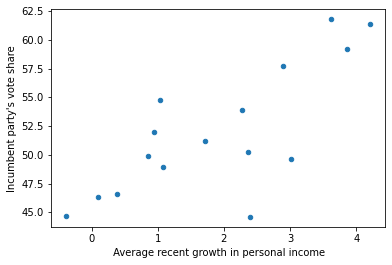

In [9]:
fig, ax = plt.subplots()
hibbs.plot(kind="scatter", x="growth", y="vote", ax=ax)
ax.set_xlabel(" Average recent growth in personal income")
ax.set_ylabel("Incumbent party's vote share");

In [10]:
model = Model(hibbs)
results = model.fit('vote ~ growth', samples=1000, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vote_sd, growth, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 22 seconds.


In [11]:
results.summary()

,mean,sd,hpd0.95_lower,hpd0.95_upper,effective_n,gelman_rubin
Intercept,47.197325,1.692537,43.943004,50.565797,1317.287518,1.000719
growth,2.627229,0.725685,1.248506,4.099710,1310.011265,1.001046
vote_sd,3.992831,0.679335,2.795701,5.369847,1171.548373,1.000554


### Ordinary Least Squares example
On page 16 the authors mention the Least Squares Approach which is `lm` in the R code. If you prefer to use this approach in python the `statsmodel.ols` method is the equivalent

In [12]:
results = smf.ols('vote ~ growth', data=hibbs).fit()
results.summary()

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   vote   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     19.32
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           0.000610
Time:                        04:59:51   Log-Likelihood:                -42.839
No. Observations:                  16   AIC:                             89.68
Df Residuals:                      14   BIC:                             91.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2476      1.622     28.514      0.000      42.769      49.726
growth         3.0605      0.696      4.396      0.001       1.567       4.554
==============================================================================
Omnibus:                        5.392   Durbin-Watson:                   2.379
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                2.828
Skew:                          -0.961   Prob(JB):                        0.243
Kurtosis:                       3.738   Cond. No.                         4.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""